In [692]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [693]:
#reading test and training data

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [694]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [695]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [696]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [698]:
#saving test data index for writing final file

Final_Index = test['PassengerId']

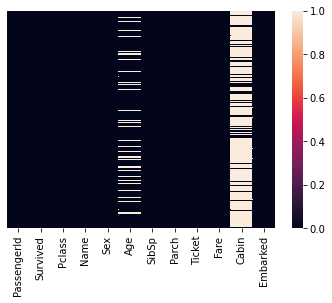

In [653]:
#checking for null values

sns.heatmap(train.isnull(),yticklabels = False)

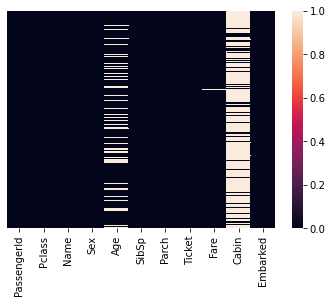

In [654]:
sns.heatmap(test.isnull(),yticklabels = False)

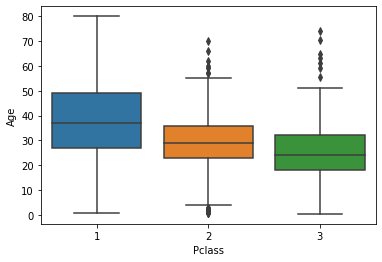

In [656]:
#import cufflinks as cf
#cf.go_offline()
b1 = sns.boxplot(x = 'Pclass', y = 'Age', data = train)

In [657]:
#Getting av age based off boxplot
c1_av = 37
c2_av = 30
c3_av = 24

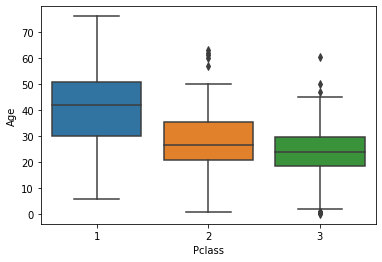

In [658]:
sns.boxplot(x = 'Pclass', y = 'Age', data = test)

In [659]:
tc1_av = 42
tc2_av = 27
tc3_av = 25

In [660]:
#functions to impute age for training and test data

def impute_age(dframe):
    Age = dframe[0]
    Pclass = dframe[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return c1_av

        elif Pclass == 2:
            return c2_av

        else:
            return c3_av

    else:
        return Age
        
def timpute_age(dframe):
    Age = dframe[0]
    Pclass = dframe[1]
    if pd.isnull(Age):

        if Pclass == 1:
            return tc1_av

        elif Pclass == 2:
            return tc2_av

        else:
            return tc3_av

    else:
        return Age

In [661]:
#applying function to fill null values

train['Age'] = train[['Age','Pclass']].apply(impute_age, axis = 1)
test['Age'] = test[['Age','Pclass']].apply(timpute_age, axis = 1)

In [662]:
#finding average fare for null value

av_fare = test[test['Pclass'] == 3]['Fare'].mean()

12.459677880184334

In [663]:
test['Fare'].fillna(value = av_fare, inplace = True)

In [664]:
#hecking if there are any null values in the fare column 

test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


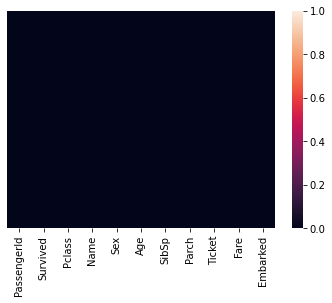

In [665]:
sns.heatmap(train.isnull(),yticklabels = False)

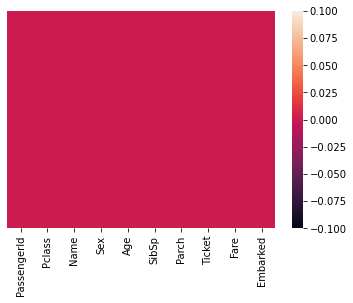

In [666]:
sns.heatmap(test.isnull(),yticklabels = False)

In [667]:
 train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [668]:
#dropping unwaned columns that will not play a role for prediction

train.drop(['Cabin','PassengerId','Ticket','Name'], inplace = True, axis = 1)
test.drop(['Cabin','PassengerId','Ticket','Name'], inplace = True, axis = 1)

In [669]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [670]:
#getting dummy values for important categorical data

sex = pd.get_dummies(train['Sex'], drop_first = True)
embark = pd.get_dummies(train['Embarked'], drop_first = True)
pclass = pd.get_dummies(train['Pclass'], drop_first = True)

In [671]:
#concatenating with original dataframe
train = pd.concat([train,sex,embark,pclass], axis = 1)

In [672]:
#getting dummy values for important categorical data

sex = pd.get_dummies(test['Sex'], drop_first = True)
embark = pd.get_dummies(test['Embarked'], drop_first = True)
pclass = pd.get_dummies(test['Pclass'], drop_first = True)

In [673]:
#concatenating with original dataframe
test = pd.concat([test,sex,embark,pclass], axis = 1)

In [674]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,0,1,0,1


In [675]:
#dropping used categorical columns

train.drop(['Pclass','Sex','Embarked'], inplace = True, axis = 1)
test.drop(['Pclass','Sex','Embarked'], inplace = True, axis = 1)

In [677]:
train.head()

,Survived,Name,Age,SibSp,Parch,Fare,male,Q,S,2,3,Title
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,0,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,0,0,0,0,Mrs
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,0,0,1,0,1,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,0,0,1,0,0,Mrs
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,0,1,Mr


In [682]:
#dividing data into attributes and class labels

X_train = train.drop('Survived',axis = 1)
y_train = train['Survived']

X_test = test

In [683]:
from sklearn.linear_model import LogisticRegression

In [684]:
#creating model instance

logr = LogisticRegression(max_iter = 1000)

In [685]:
#data fittting 

logr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [688]:
#predicting results for test data

predictions = logr.predict(X_test)

In [689]:
#reading csv file with correct classification

answers = pd.read_csv('gender_submission.csv')['Survived']

In [708]:
answers.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [716]:
#creating prediction dataFrame

Prediction = pd.DataFrame(index = Final_Index, data = predictions)

In [717]:
from sklearn.metrics import classification_report

In [718]:

print(classification_report(predictions,answers))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       266
           1       0.93      0.93      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.94      0.94       418
weighted avg       0.95      0.95      0.95       418



In [719]:
from sklearn.metrics import confusion_matrix

In [720]:
print(confusion_matrix(predictions,answers))

[[255  11]
 [ 11 141]]


In [723]:
Prediction.to_csv('First Prediction Titanic')

In [726]:
Prediction.index.names = ['Survived']

In [727]:
Prediction

,0
Survived,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
